In [1]:
import pandas as pd
exam = pd.read_csv('/Users/sebokoh/Downloads/data_source/exam.csv')

In [2]:
# 그룹핑하고난뒤 어떤 컬럼의 평균(표준편차,최소값,중간값,최빈값)을 구하는 경우
exam.groupby('nclass')\
    .agg(mean_math = ('math', 'mean'))

,mean_math
nclass,
1,46.25
2,61.25
3,45.00
4,56.75
5,78.00


In [ ]:
exam.groupby('nclass')\
    .agg(mean_math = ('math', 'mean'),
         max_mean  = ('math', 'max'),
         medidan_math = ('math', 'median'),
         n           = ('nclass', 'count')) # nclass의 빈도값

,mean_math,max_mean,medidan_math,n
nclass,,,,
1,46.25,60,47.5,4
2,61.25,90,65.0,4
3,45.00,65,47.5,4
4,56.75,75,53.0,4
5,78.00,89,79.0,4


In [4]:
groupby_nclass = exam.groupby('nclass')\
                     .agg(mean_math = ('math', 'mean'),
                          max_mean  = ('math', 'max'),
                          medidan_math = ('math', 'median'),
                          n           = ('nclass', 'count')) # nclass의 빈도값

In [5]:
groupby_nclass

,mean_math,max_mean,medidan_math,n
nclass,,,,
1,46.25,60,47.5,4
2,61.25,90,65.0,4
3,45.00,65,47.5,4
4,56.75,75,53.0,4
5,78.00,89,79.0,4


In [6]:
type(groupby_nclass)

pandas.core.frame.DataFrame

In [ ]:
#가로로 컬럼을 병합할때는 pd.merge(), 세로로 병합할때는 pd.concat()
# pd.merge(병합1,병합2컬럼, how='left', on='기준컬럼') 
# pd.concat([병합할컬럼1, 병합할컬럼2], ignore_index=True) 
#    ---> 중요한 것은 괄호안에 []로 묶어줘야 한다는 법칙이다, 또 인덱스가 처리가 안되기에 기존인덱스를 무시하고 새로운
#인덱스를 만들기에 ignore_index=True를 추가해야 한다



In [4]:
mpg = pd.read_csv('/Users/sebokoh/Downloads/data_source/mpg.csv')
mpg

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,category
0,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
1,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
2,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
3,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
4,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact
...,...,...,...,...,...,...,...,...,...,...,...
229,volkswagen,passat,2.0,2008,4,auto(s6),f,19,28,p,midsize
230,volkswagen,passat,2.0,2008,4,manual(m6),f,21,29,p,midsize
231,volkswagen,passat,2.8,1999,6,auto(l5),f,16,26,p,midsize
232,volkswagen,passat,2.8,1999,6,manual(m5),f,18,26,p,midsize


In [ ]:
# 제조회사('manufacturer') 및 구동방식('drv') 별 분리- (4:사륜구동, f:전륜구동, r:후륜구동)
# groupby([]) 대괄호를 잊어버리면 안된다(2개의 컬럼 이상을 그룹화시킬때는 반드시 리스트화시킨다)
# 도시연비('cty') 평균 구하기
mpg.groupby(['manufacturer', 'drv'])\
    .agg(mean_cty = ('cty', 'mean'))

mean_cty
manufacturer drv           
audi         4    16.818182
             f    18.857143
chevrolet    4    12.500000
             f    18.800000
             r    14.100000
dodge        4    12.000000
             f    15.818182
ford         4    13.307692
             r    14.750000
honda        f    24.444444
hyundai      f    18.642857
jeep         4    13.500000
land rover   4    11.500000
lincoln      r    11.333333
mercury      4    13.250000
nissan       4    13.750000
             f    20.000000
pontiac      f    17.000000
subaru       4    19.285714
toyota       4    14.933333
             f    21.368421
volkswagen   f    20.925926

In [11]:
# 아우디의 구동방식만 추출하고 싶다면
mpg.query('manufacturer == "audi"')\
    .groupby('drv')\
        .agg(n =('drv', 'count'))  # agg(파생함수명 = ('컬럼명', '함수명')) 법칙을 꼭 지켜야 한다

,n
drv,
4,11
f,7


In [7]:
# 제조회사별 suv자동차의 도시및 고속도로연비합산평균을 구해 내림차순으로 정리하기
# suv추출-합산연비변수 만들기-제조 회사별로 분리-합산연비 평균 구하기- 내림차순정렬- "1-5위까지"출력
mpg.query('category == "suv"')\
    .assign(totaly = mpg['cty'] + mpg['hwy'])\
    .groupby('manufacturer')\
    .agg(mean_tot = ('totaly', 'mean'))\
    .sort_values("mean_tot", ascending=False).head()    
           

,mean_tot
manufacturer,
subaru,43.833333
toyota,32.625000
nissan,31.750000
mercury,31.250000
jeep,31.125000


In [12]:
# 어떤 차종의 도시 연비가 높은지 비교하기
mpg.groupby('category')\
    .agg(mean_cty = ('cty', 'mean'))

,mean_cty
category,
2seater,15.400000
compact,20.127660
midsize,18.756098
minivan,15.818182
pickup,13.000000
subcompact,20.371429
suv,13.500000


In [ ]:
#어떤 차종의 도시연비가 높은지 쉽게 알아볼 수 있도록 cty평균이 높은 순으로 출력하기
mpg.groupby('category')\
    .agg(mean_cty = ('cty', 'mean'))\
    .sort_values('mean_cty', ascending=False).head()

,mean_cty
category,
subcompact,20.371429
compact,20.127660
midsize,18.756098
minivan,15.818182
2seater,15.400000
suv,13.500000
pickup,13.000000


In [19]:
# 고속도로 연비가 가장 높은 회사의 자동차 구하기
#hwy 평균이 가장 높은 회사 3곳을 출력- 문제 2의 코드에 head()추가
mpg.groupby('manufacturer')\
    .agg(mean_hwy = ('hwy', 'mean'))\
    .sort_values('mean_hwy', ascending=False)\
    .head(10)

,mean_hwy
manufacturer,
honda,32.555556
volkswagen,29.222222
hyundai,26.857143
audi,26.444444
pontiac,26.400000
subaru,25.571429
toyota,24.911765
nissan,24.615385
chevrolet,21.894737


In [22]:
#'compact'차종을 가장 많이 생산한 회사 알아보기
#회사별 'compact'차종 수를 내림차순으로 정렬해서 출력
mpg.query('category == "compact"')\
    .groupby('manufacturer')\
    .agg(count_cat = ('category', 'count'))\
    .sort_values('count_cat', ascending=False)    
    
    

,count_cat
manufacturer,
audi,15
volkswagen,14
toyota,12
subaru,4
nissan,2


In [1]:
import pandas as pd
mpg = pd.read_csv("/Users/sebokoh/Downloads/data_source/mpg.csv")
mpg

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,category
0,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
1,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
2,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
3,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
4,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact
...,...,...,...,...,...,...,...,...,...,...,...
229,volkswagen,passat,2.0,2008,4,auto(s6),f,19,28,p,midsize
230,volkswagen,passat,2.0,2008,4,manual(m6),f,21,29,p,midsize
231,volkswagen,passat,2.8,1999,6,auto(l5),f,16,26,p,midsize
232,volkswagen,passat,2.8,1999,6,manual(m5),f,18,26,p,midsize


In [2]:
mpg.info


<bound method DataFrame.info of     manufacturer   model  displ  year  cyl       trans drv  cty  hwy fl  \
0           audi      a4    1.8  1999    4    auto(l5)   f   18   29  p   
1           audi      a4    1.8  1999    4  manual(m5)   f   21   29  p   
2           audi      a4    2.0  2008    4  manual(m6)   f   20   31  p   
3           audi      a4    2.0  2008    4    auto(av)   f   21   30  p   
4           audi      a4    2.8  1999    6    auto(l5)   f   16   26  p   
..           ...     ...    ...   ...  ...         ...  ..  ...  ... ..   
229   volkswagen  passat    2.0  2008    4    auto(s6)   f   19   28  p   
230   volkswagen  passat    2.0  2008    4  manual(m6)   f   21   29  p   
231   volkswagen  passat    2.8  1999    6    auto(l5)   f   16   26  p   
232   volkswagen  passat    2.8  1999    6  manual(m5)   f   18   26  p   
233   volkswagen  passat    3.6  2008    6    auto(s6)   f   17   26  p   

    category  
0    compact  
1    compact  
2    compact  
3    co

In [4]:
import numpy as np
mpg.loc[[64, 123, 130, 152, 211], 'hwy'] = np.nan # NaN 할당하기

In [5]:
mpg[['drv', 'hwy']].isna()

,drv,hwy
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
...,...,...
229,False,False
230,False,False
231,False,False
232,False,False


In [6]:
mpg[['drv', 'hwy']].isna().sum()

drv    0
hwy    5
dtype: int64

In [12]:
# 고속도로 연비 컬럼의 결측치를 제거하고 어떤 구동방식의 고속도로 연비 평균이 높은지
#1. 고속도로 연비의 결측치제거 2. 구동방식별 그룹핑  3. 고속도로 연비평균 구하기
mpg_new = mpg.dropna(subset = ['drv'])\
             .groupby(['drv'])\
             .agg(mean_hwy = ('hwy', 'mean'))
mpg_new             
         
    

,mean_hwy
drv,
4,19.242424
f,28.200000
r,21.000000


In [13]:
mpg.loc[[9, 13, 57, 92], 'drv'] = 'k'  #drv 이상치 할당
mpg.loc[[28, 42, 129, 202], 'cty'] = [3, 4, 39, 48] #cty 이상치 할당


In [15]:
mpg['drv'].value_counts()

drv
f    106
4    100
r     24
k      4
Name: count, dtype: int64

In [16]:
mpg['drv'].value_counts().sort_index()

drv
4    100
f    106
k      4
r     24
Name: count, dtype: int64

In [21]:
mpg['drv'] = np.where(mpg['drv'].isin(['4', 'f', 'r']), mpg['drv'], np.nan)
mpg['drv'].value_counts()

drv
f    106
4    100
r     24
Name: count, dtype: int64

<Axes: ylabel='cty'>

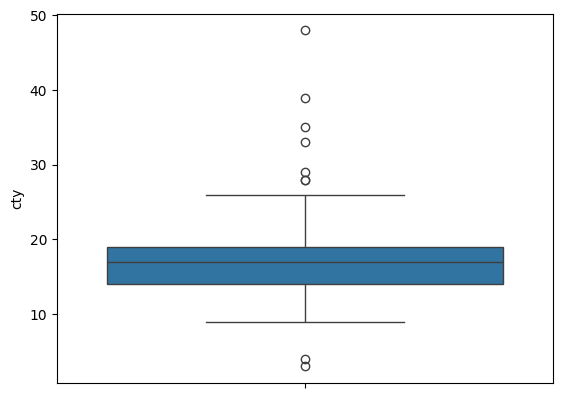

In [22]:
# 데이터프레임에 quantile()를 이용해, 상자 그림에 정상 기준을 찾
import seaborn as sns 
sns.boxplot(data = mpg, y = 'cty')

In [43]:
pct25 = mpg['cty'].quantile(.25)  # 1사분위수
pct25


np.float64(14.0)

In [44]:
pct75 = mpg['cty'].quantile(.75) #3사분위수
pct75

np.float64(19.0)

In [45]:
iqr = pct75-pct25  # IQR
iqr

np.float64(5.0)

In [46]:
pct25 - 1.5 * iqr   #하한





np.float64(6.5)

In [47]:
pct75 + 1.5 * iqr    # 상한

np.float64(26.5)

In [50]:
# 6.5~26.5 벗어나면 NaN
mpg['cty'] = np.where((mpg['cty'] < 6.5) | (mpg['cty'] > 26.5), np.nan, mpg['cty'])

<Axes: ylabel='cty'>

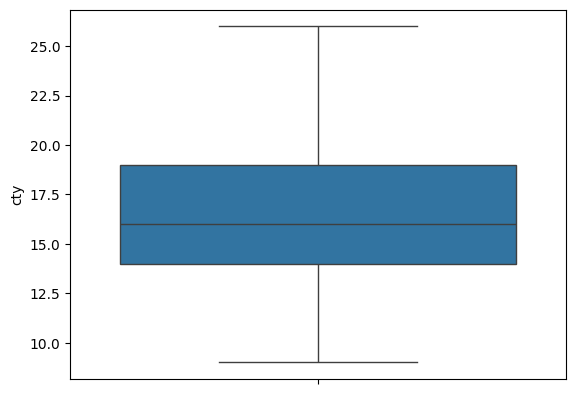

In [51]:
sns.boxplot(data = mpg, y = 'cty')

In [52]:
#drv.cty 결측치 제거
# drv별 분리
#cty 평균 구하기
mpg.dropna(subset = ['drv', 'cty'])\
    .groupby('drv')\
    .agg(mean_cty = ('cty', 'mean'))

,mean_cty
drv,
4,14.268041
f,19.470000
r,13.958333


In [3]:
import pandas as pd
mpg = pd.read_csv("/Users/sebokoh/Downloads/data_source/mpg.csv")
mpg

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,category
0,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
1,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
2,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
3,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
4,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact
...,...,...,...,...,...,...,...,...,...,...,...
229,volkswagen,passat,2.0,2008,4,auto(s6),f,19,28,p,midsize
230,volkswagen,passat,2.0,2008,4,manual(m6),f,21,29,p,midsize
231,volkswagen,passat,2.8,1999,6,auto(l5),f,16,26,p,midsize
232,volkswagen,passat,2.8,1999,6,manual(m5),f,18,26,p,midsize


In [1]:
import matplotlib.pyplot as plt


In [4]:
x=mpg['displ']
x

0      1.8
1      1.8
2      2.0
3      2.0
4      2.8
      ... 
229    2.0
230    2.0
231    2.8
232    2.8
233    3.6
Name: displ, Length: 234, dtype: float64

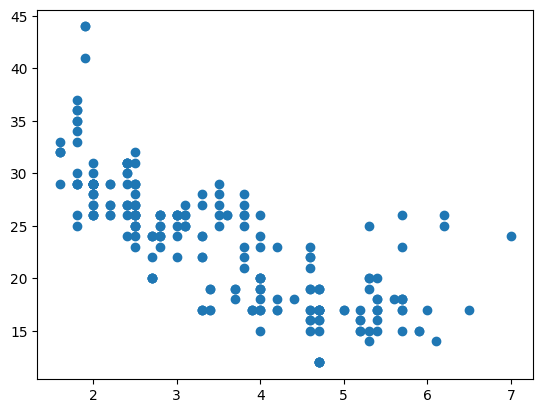

In [5]:
plt.scatter(x = mpg['displ'], y=mpg['hwy'])

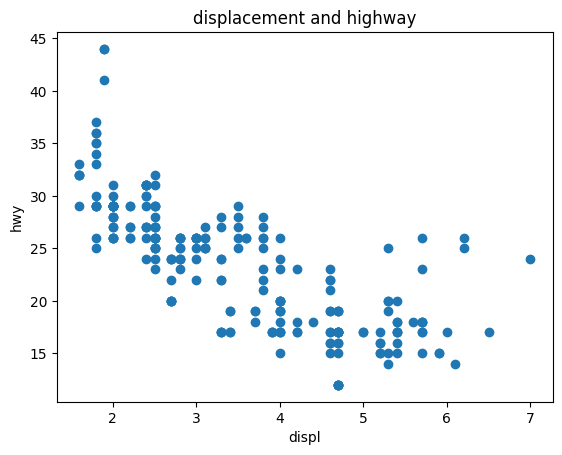

In [7]:
plt.scatter(x = mpg['displ'], y = mpg['hwy'])
plt.title('displacement and highway')
plt.xlabel('displ')
plt.ylabel('hwy')
plt.show()

In [8]:
import seaborn as sns

<Axes: xlabel='displ', ylabel='hwy'>

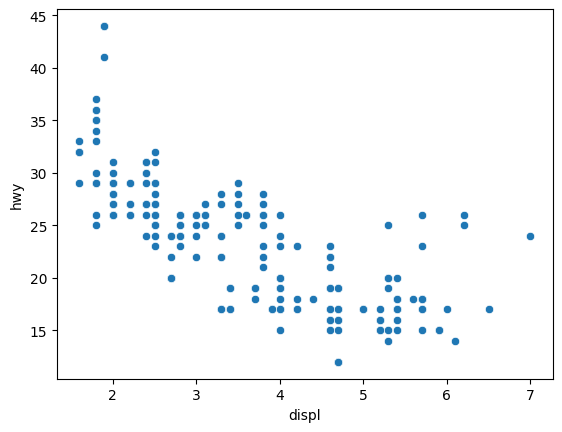

In [9]:
sns.scatterplot(data=mpg, x='displ', y = 'hwy')

Text(0, 0.5, 'highway')

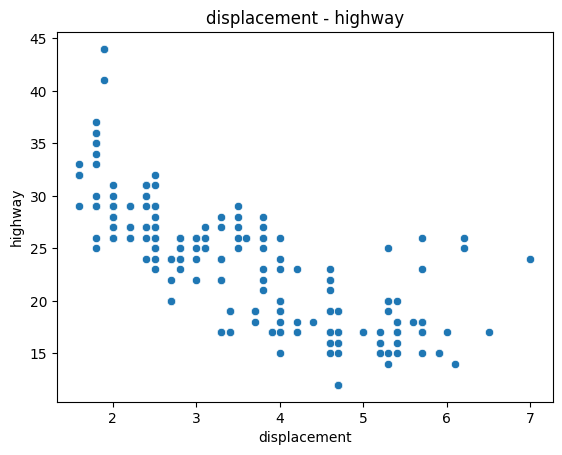

In [12]:
import matplotlib.pyplot as plt 
import seaborn as sns 
sns.scatterplot(data=mpg, x='displ', y = 'hwy')
plt.title('displacement - highway')
plt.xlabel('displacement')
plt.ylabel('highway')


[(3.0, 6.0), (10.0, 30.0)]

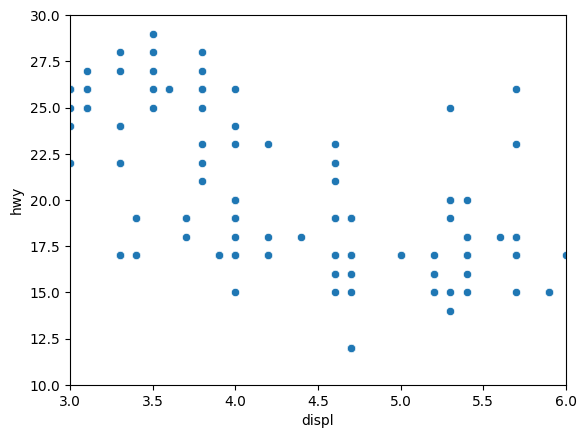

In [14]:
sns.scatterplot(data=mpg, x='displ', y = 'hwy')\
.set(xlim = [3, 6], ylim = [10, 30])

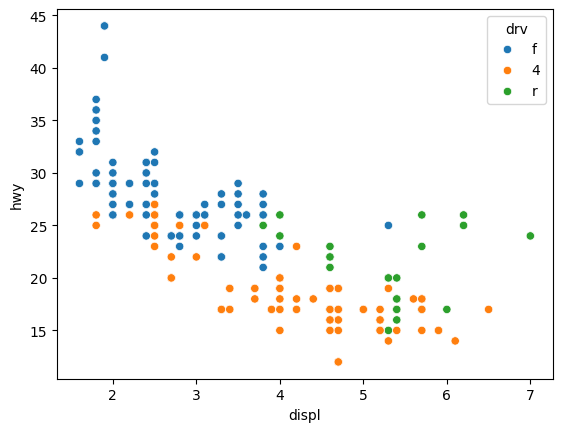

In [16]:
sns.scatterplot(data=mpg, x='displ', y = 'hwy', hue = 'drv');

In [18]:
import pandas as pd
economics = pd.read_csv("/Users/sebokoh/Downloads/data_source/economics.csv")
economics.head()

,date,pce,pop,psavert,uempmed,unemploy
0,1967-07-01,506.7,198712.0,12.6,4.5,2944
1,1967-08-01,509.8,198911.0,12.6,4.7,2945
2,1967-09-01,515.6,199113.0,11.9,4.6,2958
3,1967-10-01,512.2,199311.0,12.9,4.9,3143
4,1967-11-01,517.4,199498.0,12.8,4.7,3066


In [19]:
economics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 574 entries, 0 to 573
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   date      574 non-null    object 
 1   pce       574 non-null    float64
 2   pop       574 non-null    float64
 3   psavert   574 non-null    float64
 4   uempmed   574 non-null    float64
 5   unemploy  574 non-null    int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 27.0+ KB


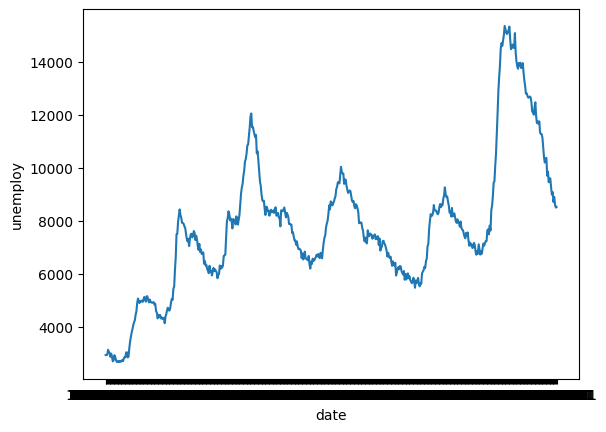

In [22]:
sns.lineplot(data = economics, x ='date', y = 'unemploy');

In [25]:
#날짜 시간 타입 변수 만들기
economics['date2'] = pd.to_datetime(economics['date'])
economics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 574 entries, 0 to 573
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      574 non-null    object        
 1   pce       574 non-null    float64       
 2   pop       574 non-null    float64       
 3   psavert   574 non-null    float64       
 4   uempmed   574 non-null    float64       
 5   unemploy  574 non-null    int64         
 6   date2     574 non-null    datetime64[ns]
dtypes: datetime64[ns](1), float64(4), int64(1), object(1)
memory usage: 31.5+ KB


In [26]:
economics['date2'].dt.year

0      1967
1      1967
2      1967
3      1967
4      1967
       ... 
569    2014
570    2015
571    2015
572    2015
573    2015
Name: date2, Length: 574, dtype: int32

In [27]:
economics['year'] = economics['date2'].dt.year
economics.head()

,date,pce,pop,psavert,uempmed,unemploy,date2,year
0,1967-07-01,506.7,198712.0,12.6,4.5,2944,1967-07-01,1967
1,1967-08-01,509.8,198911.0,12.6,4.7,2945,1967-08-01,1967
2,1967-09-01,515.6,199113.0,11.9,4.6,2958,1967-09-01,1967
3,1967-10-01,512.2,199311.0,12.9,4.9,3143,1967-10-01,1967
4,1967-11-01,517.4,199498.0,12.8,4.7,3066,1967-11-01,1967


/var/folders/dd/f2k55d550k56jsv4rd7v1_3m0000gn/T/ipykernel_75738/3487657898.py:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data = economics, x = 'year', y = 'unemploy',ci=None);


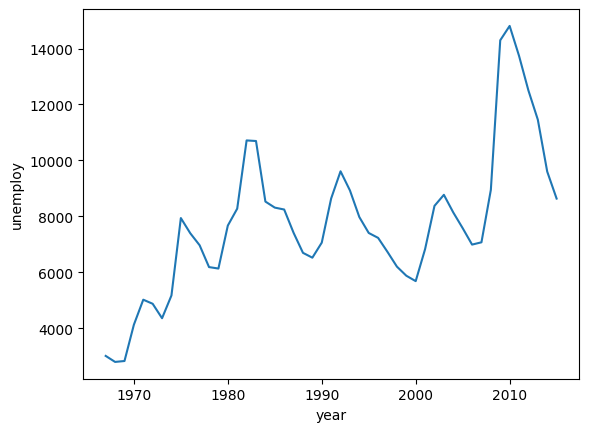

In [31]:
sns.lineplot(data = economics, x = 'year', y = 'unemploy',ci=None);

In [32]:
df_mpg = mpg.groupby('drv')
df_mpg

In [33]:
df_mpg = mpg.groupby('drv')\
            .agg(mean_hwy = ('hwy', 'mean'))
df_mpg            


,mean_hwy
drv,
4,19.174757
f,28.160377
r,21.000000


In [ ]:
# drv별 분리
# hwy 평균 구하기

df_mpg = mpg.groupby('drv', as_index=False)\
            .agg(mean_hwy = ('hwy', 'mean'))
df_mpg   

,drv,mean_hwy
0,4,19.174757
1,f,28.160377
2,r,21.000000


/var/folders/dd/f2k55d550k56jsv4rd7v1_3m0000gn/T/ipykernel_75738/1142228196.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data = df_mpg, x='drv', y='mean_hwy',palette='Set2')


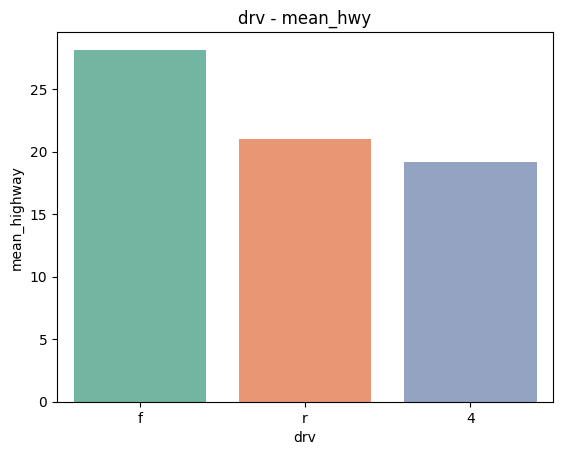

In [46]:
 
import seaborn as sns
import matplotlib.pyplot as plt

sns.barplot(data = df_mpg, x='drv', y='mean_hwy',palette='Set2')
plt.title("drv - mean_hwy")
plt.xlabel('drv')
plt.ylabel('mean_highway');

In [63]:
df_mpg = df_mpg.sort_values('mean_hwy', ascending=False);
df_mpg

KeyError: 'mean_hwy'

In [62]:
#집단별 빈도표 만들기
df_mpg = mpg.groupby('drv', as_index=False)\
            .agg(n = ('drv', 'count'))
df_mpg   

,drv,n
0,4,103
1,f,106
2,r,25


/var/folders/dd/f2k55d550k56jsv4rd7v1_3m0000gn/T/ipykernel_75738/2245081501.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data = df_mpg, x='drv', y='n',palette='Set2');


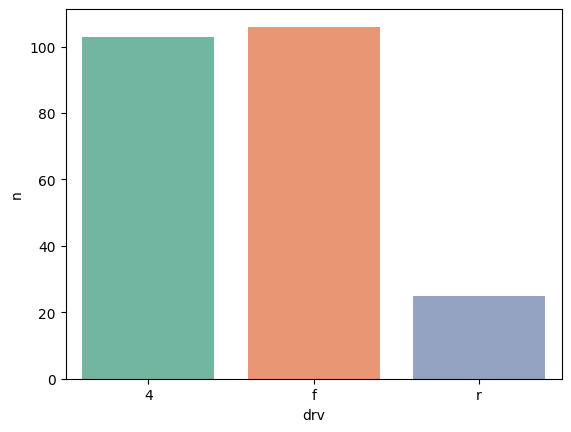

In [61]:
import seaborn as sns


sns.barplot(data = df_mpg, x='drv', y='n',palette='Set2');


<Axes: xlabel='count', ylabel='n'>

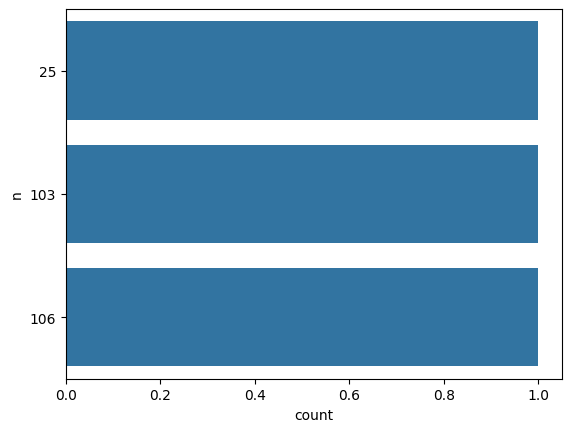

In [60]:
sns.countplot(data=df_mpg, y='n')

<Axes: xlabel='drv', ylabel='count'>

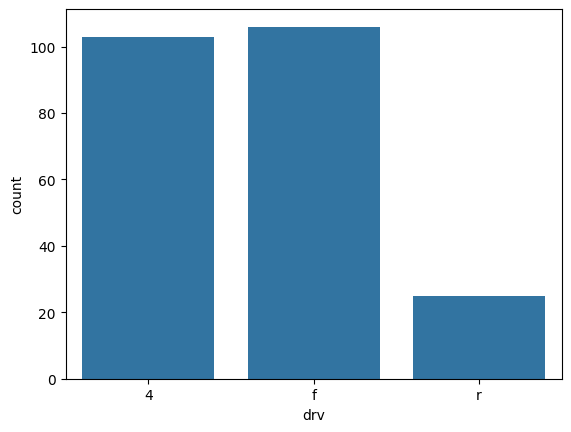

In [69]:
sns.countplot(data = mpg, x='drv', order=['4', 'f', 'r'])

/var/folders/dd/f2k55d550k56jsv4rd7v1_3m0000gn/T/ipykernel_75738/7677102.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=mpg, x='category',palette='Set2',\


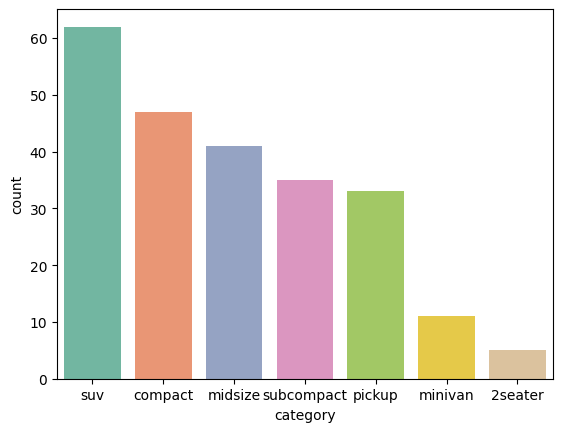

In [76]:
# 자동차 종류인 카테고리별로 나눠서 자동차 대수를 알고 싶다
sns.countplot(data=mpg, x='category',palette='Set2',\
    order = mpg['category'].value_counts().index);

/var/folders/dd/f2k55d550k56jsv4rd7v1_3m0000gn/T/ipykernel_75738/783081655.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=mpg, x='drv', y='hwy',palette='Set2')


<Axes: xlabel='drv', ylabel='hwy'>

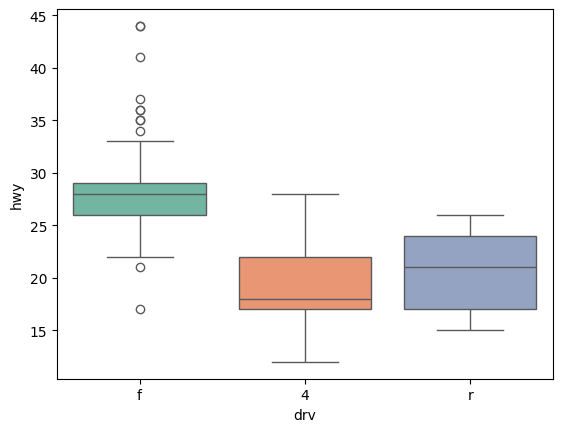

In [81]:
sns.boxplot(data=mpg, x='drv', y='hwy',palette='Set2')